# Problem:  Finding out the features responsible/ factors responsible for forest fire.

In [556]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [557]:
# Loding dataset from local system
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [558]:
''' Droping the rows which has no value in the dataset  '''

df = df.drop([122,123],axis=0)
df.reset_index(inplace=True)

In [559]:
''' Checking the head of data '''
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [560]:
''' Dropping index cloumn as we already got the revised index by resetting the index ''' 
df=df.drop('index',axis=1)

In [561]:
df[0:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


# Creating a new column 

In [562]:
df['Region'] = ''

In [563]:
df[:122]=df[:122].replace('','Bejaia')

In [564]:
df.shape

(244, 15)

In [565]:
df[122:245]=df[122:245].replace('','Sidi-Bel')

In [566]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [567]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel


In [568]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,Bejaia
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


Observation: We do not get any clear idea of data from this operation.

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


Observation: we can see here that Classes have a null value. 
    All The data types are object datatype.
    There are 15 columns and 244 rows.

In [570]:
convert_dict = {"Temperature":float,' RH':float,' Ws':float,'Rain ':float,"FFMC":float,"DMC":float,"DC":float,"ISI":float,"BUI":float,"FWI":float}

In [571]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [572]:
df[' RH'] = pd.to_numeric(df[' RH'])

In [573]:
Column_list = ["Temperature",' RH',' Ws','Rain ',"FFMC","DMC","DC","ISI","BUI","FWI"]

In [574]:
df[160:170]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
160,09,07,2012,36,43,15,1.9,82.3,9.4,9.9,3.2,9,3.1,fire,Sidi-Bel
161,10,07,2012,34,51,16,3.8,77.5,8,9.5,2,7.7,1.3,not fire,Sidi-Bel
162,11,07,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire,Sidi-Bel
163,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire,Sidi-Bel
164,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,Sidi-Bel
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel
166,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,Sidi-Bel
167,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire,Sidi-Bel
168,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire,Sidi-Bel
169,18,07,2012,33,68,15,0,86.1,23.9,51.6,5.2,23.9,9.1,fire,Sidi-Bel


In [575]:
df["DC"]=df["DC"].replace("14.6 9", "14.6")

In [576]:
df["FWI"]=df["FWI"].replace("fire   ", "9")

In [577]:
df['Classes  '].fillna("fire", inplace = True)

In [578]:
df[:122]=df[:122].replace('','Bejaia')

In [579]:
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')

In [580]:
for i in Column_list:
    df[i] = pd.to_numeric(df[i])
    

In [581]:
df["day"] =  pd.to_datetime(df["day"], format="%d")

In [582]:
df["month"] =  pd.to_datetime(df["month"], format="%m")

In [583]:
df["year"] =  pd.to_datetime(df["year"], format="%Y")

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    datetime64[ns]
 1   month        244 non-null    datetime64[ns]
 2   year         244 non-null    datetime64[ns]
 3   Temperature  244 non-null    int64         
 4    RH          244 non-null    int64         
 5    Ws          244 non-null    int64         
 6   Rain         244 non-null    float64       
 7   FFMC         244 non-null    float64       
 8   DMC          244 non-null    float64       
 9   DC           244 non-null    float64       
 10  ISI          244 non-null    float64       
 11  BUI          244 non-null    float64       
 12  FWI          244 non-null    float64       
 13  Classes      244 non-null    object        
 14  Region       244 non-null    object        
 15  dateInt      244 non-null    object        
 16  Date    

In [585]:
df[df['Classes  '].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,dateInt,Date


data is seperated into datetime object, int, float and object dtype as it will be easier for us to make numerical and categorical data.

# Descriptive analyasis

In [586]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.043443
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.426307
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


Observation: Total Count - 244 

we can get an idea of data and it's spread for a particular column.

# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

# Maintaining Data into categories

In [587]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features.remove('Date')
categorical_features.remove('dateInt')
# print columns
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features : {categorical_features}')

We have 13 numerical features : ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 2 categorical features : ['Classes  ', 'Region']


# Univariate Analysis

''' Getting the idea of distribution of variable  '''
 Univariate continuous data

Numerical feartures

In [588]:
# Removing day, month and year from numerical data
date_y = ['day', 'month', 'year']

numeric_features = [ele for ele in numeric_features if ele not in date_y]

In [589]:
numeric_features

['Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

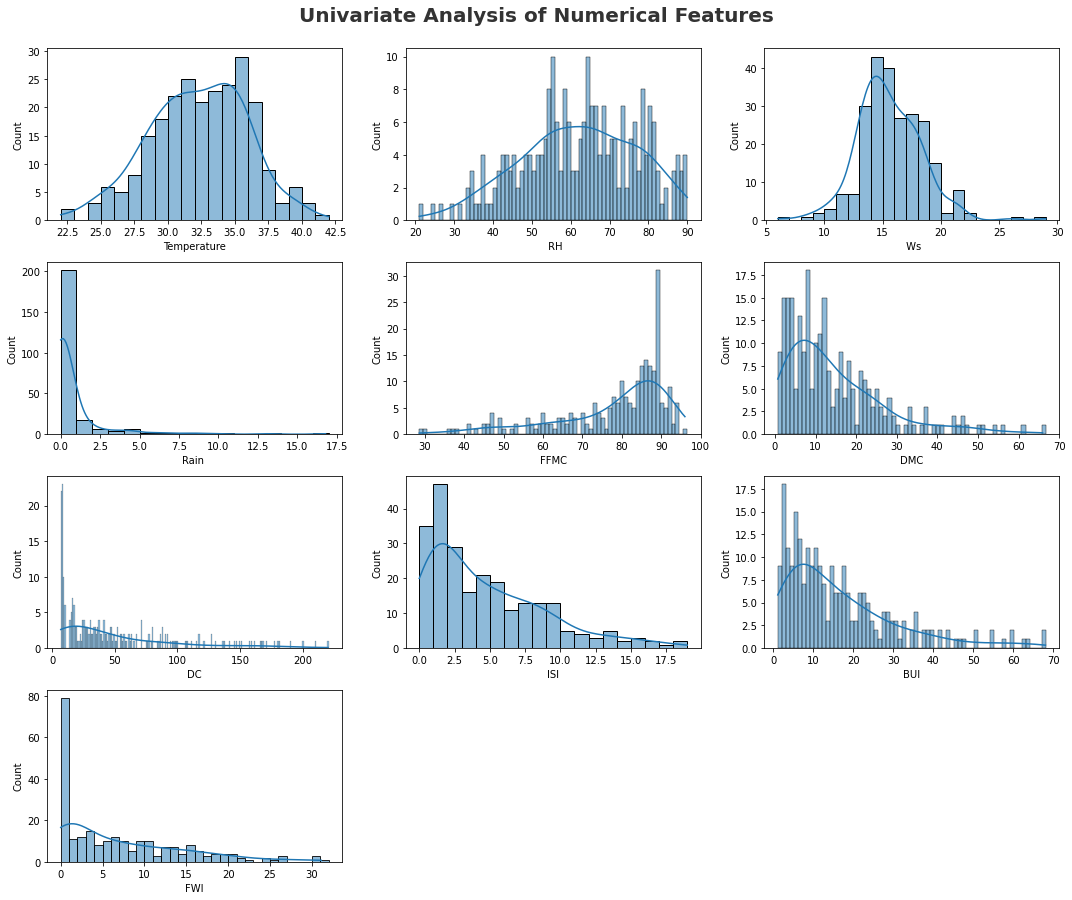

In [590]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=df[numeric_features[i]],binwidth=1,bins=20,kde=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Observation: Right skewed data - DMC (Duff moisture code), BUI (Buildup Index),Fire weather Index (FWI), Intial spread index (ISI)
    
            Normally distributted data: Temperature, Relative humidity, Wind speed (Ws)
        
            Left Skewed data: Fine Fuel Moisture Code (FFMC)
                
            Outliers: Rain, Drought Code (DC), Fire weather Index (FWI) --- Further investigation needed.
            
            

# Fire Weather Index (FWI) System

Fine Fuel Moisture Code
The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.

Duff Moisture Code
The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

Drought Code
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

Initial Spread Index
The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI.

Buildup Index
The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion. It is based on the DMC and the DC. The BUI is generally less than twice the DMC value, and moisture in the DMC layer is expected to help prevent burning in material deeper down in the available fuel.

Fire Weather Index
The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas.


categorical data

In [591]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [592]:
# Removing the white spaces from the column.
df['Classes  '] = df['Classes  '].str.strip()

In [593]:
df['Classes  '].unique()

array(['not fire', 'fire'], dtype=object)

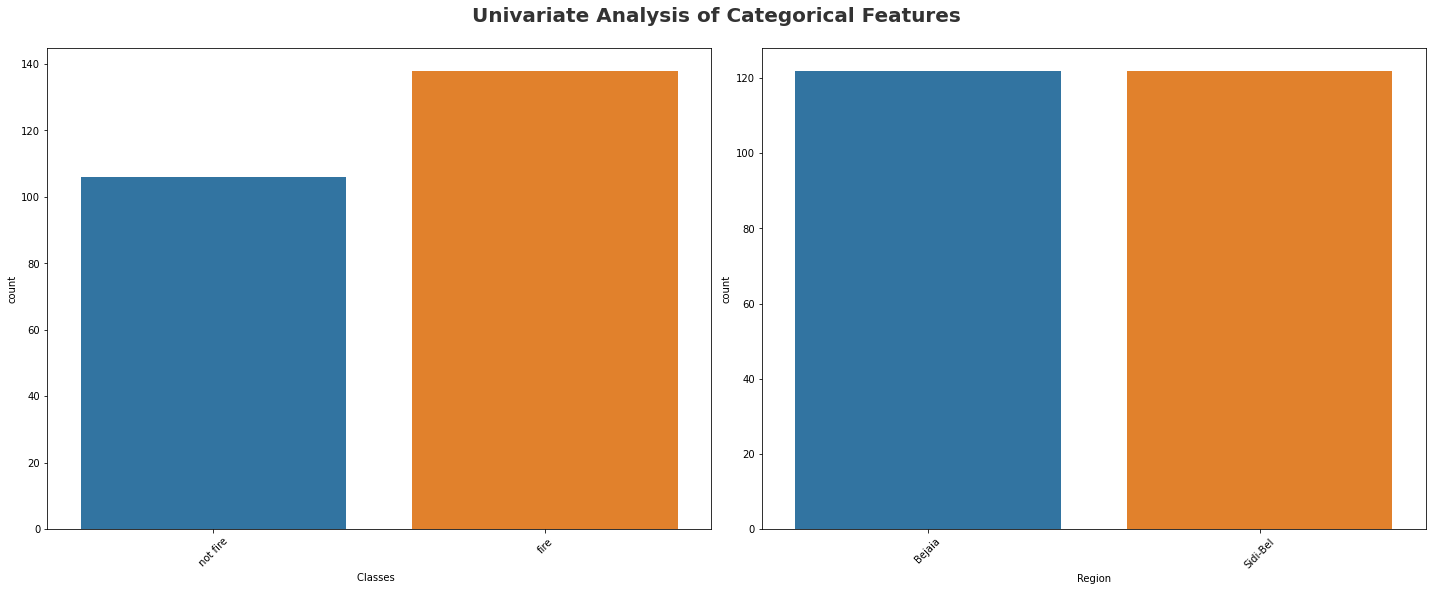

In [594]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Observation: As we can see for equal amount of data in both the region, Occurence of fire is more. 
    
    Data is imbalanced.
    
    There is more fire instances in the given time frame.

# Multivariate Data

In [595]:
df[numeric_features].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.565965
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.579319
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.033277
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324628
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.691026
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875545
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.737810
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.918226
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857025
FWI,0.565965,-0.579319,0.033277,-0.324628,0.691026,0.875545,0.737810,0.918226,0.857025,1.000000


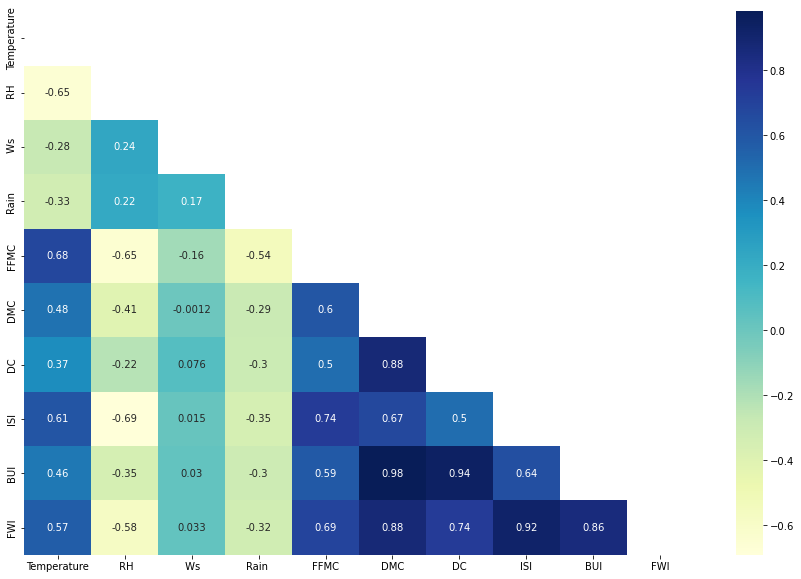

In [596]:
plt.figure(figsize = (15,10))
mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

Observation: FFMC-ISI (0.74), DMC-FWI (0.88),DMC-BUI (0.98),DMC-DC (0.88),DC-BUI (0.94), ISI-FWI (0.92), BUI-FWI (0.86) 
    
    These are highly correlated features.

# multicolinearity test

In [597]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region', 'dateInt',
       'Date'],
      dtype='object')

In [598]:
df2 = df[['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']]

In [599]:
df2

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [600]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

df2['Classes  '] = df2['Classes  '].map({'not fire':0, 'fire':1})
X = df2
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

        feature         VIF
0   Temperature  107.504907
1            RH   31.337394
2            Ws   37.085764
3         Rain     1.654162
4          FFMC  126.414872
5           DMC  185.363593
6            DC   51.215891
7           ISI   49.259421
8           BUI  406.658699
9           FWI   70.979638
10    Classes      7.149029


VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. 

VIF starts at 1 and has no upper limit

If VIF = 1, no correlation between the independent variable and the other variables

If VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

Here , We can see that Temperature, Buildup Index (BUI),Duff Moisture Code (DMC),Fine Fuel Moisture Code (FFMC)are higly correlated.

By definition These factors are higly related to causing fire.

# Rectifying Multicolinearity

In [601]:
# Removing BUI from the dataframe
df3 = df[['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'FWI', 'Classes  ']]
df3['Classes  '] = df3['Classes  '].map({'not fire':0, 'fire':1})
X = df3
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature         VIF
0  Temperature  106.537391
1           RH   31.252400
2           Ws   37.085587
3        Rain     1.651912
4         FFMC  124.743651
5          DMC   26.686148
6           DC   11.540370
7          ISI   46.902769
8          FWI   65.895637
9    Classes      7.088466


In [602]:
# Removing FFMC from the dataframe

df4 = df[['Temperature', ' RH', ' Ws', 'Rain ',
       'DMC', 'DC', 'ISI', 'FWI', 'Classes  ']]
df4['Classes  '] = df4['Classes  '].map({'not fire':0, 'fire':1})
X = df4
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature        VIF
0  Temperature  37.655594
1           RH  31.241144
2           Ws  35.430947
3        Rain    1.473635
4          DMC  25.281630
5           DC  11.499867
6          ISI  43.728548
7          FWI  60.668340
8    Classes     5.720086


In [603]:
# Removing FWI (Fire weather index) from the dataframe

df5 = df[['Temperature', ' RH', ' Ws', 'Rain ',
       'DMC', 'DC', 'ISI', 'Classes  ']]
df5['Classes  '] = df5['Classes  '].map({'not fire':0, 'fire':1})
X = df5
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature        VIF
0  Temperature  33.064804
1           RH  31.111169
2           Ws  35.334224
3        Rain    1.443124
4          DMC  15.889163
5           DC  10.405300
6          ISI  11.122110
7    Classes     5.719939


Observation: There is not much changes in VIF score, after removing FWI, So we can conclude that Temperature, RH,Ws,Rain,DMC,DC,ISI are independent features for regression analysis.

In [604]:
#Checking Null values

In [605]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dateInt        0
Date           0
dtype: int64

# Visualisation Of Data and analysis

<Figure size 1200x1200 with 0 Axes>

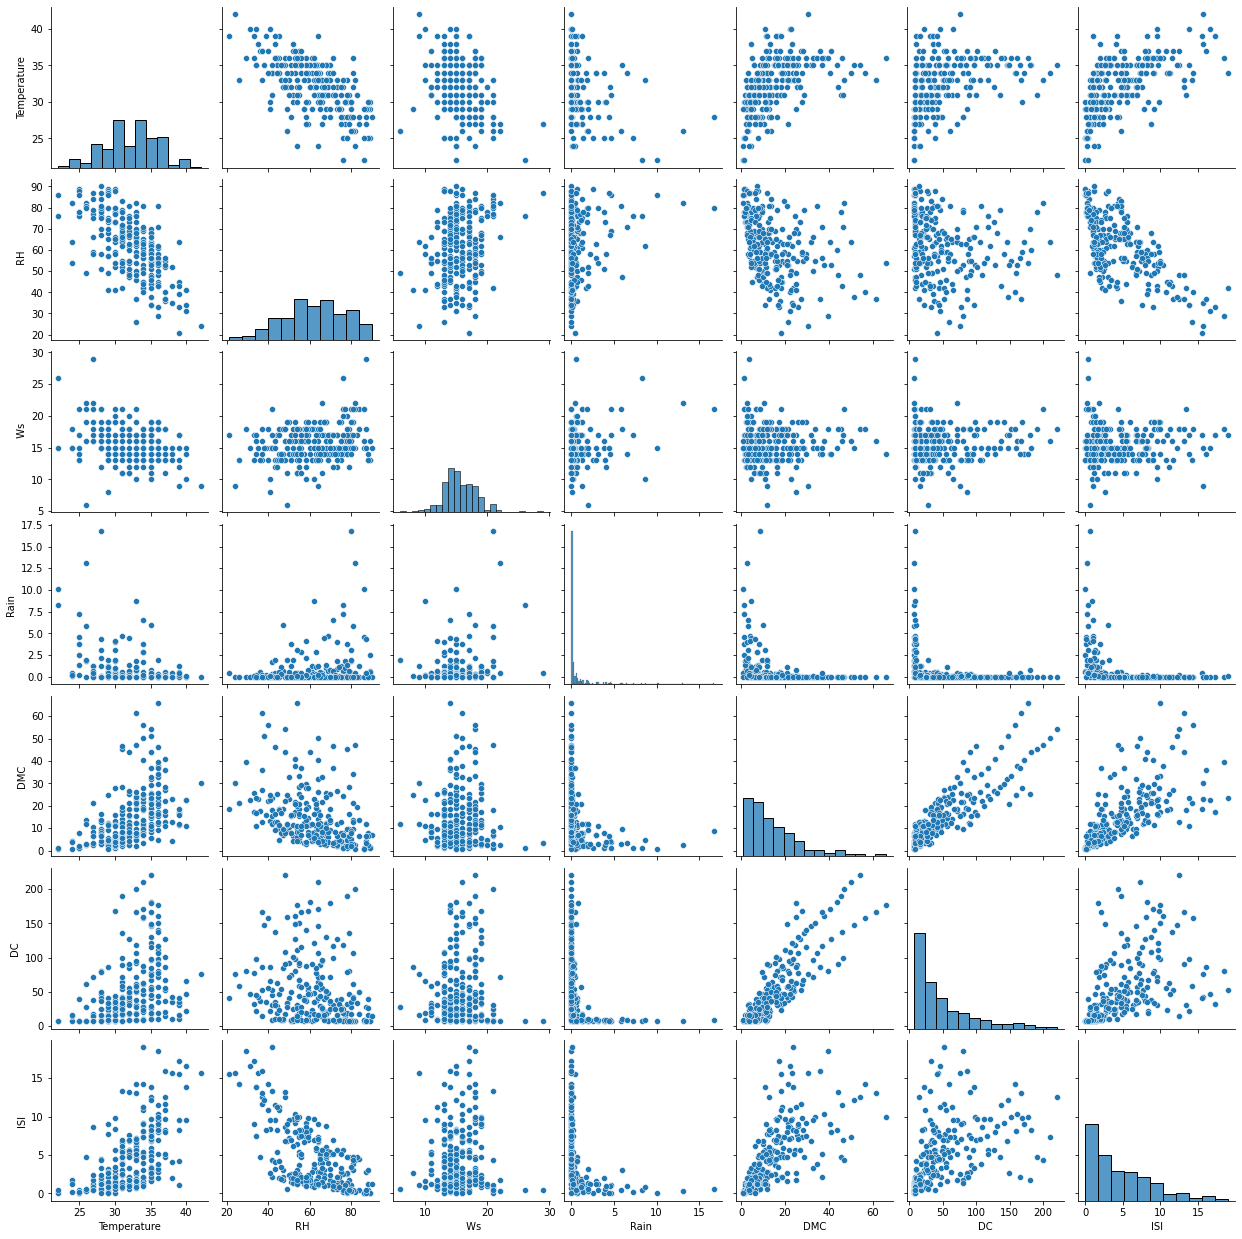

In [606]:
plt.figure(figsize=(8,8),dpi=150)
sns.pairplot(df5.drop('Classes  ',axis=1))

Observation: Initial observation gives the relationship and spread of data compared to each other.
    
DMC and DC has linear kind of relationship. Also ISI and DC has linear relationship.

Rain has rectangular parabolic relationship with all the Features.



In [607]:
# checking the mean of all columns with respect to classes column.
df.groupby(['Classes  ']).mean()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Classes,,,,,,,,,,
fire,33.818841,56.275362,15.340580,0.097101,87.544928,20.992754,70.409420,7.460145,23.918841,11.713043
not fire,30.028302,69.311321,15.716981,1.624528,65.315094,6.446226,21.790566,1.277358,7.220755,0.964151


Observation : we can see here that under mean temperature 30, there is a possibility of no fire. So e will analyse the data under 30 that what causes fire under 30.

In [608]:
# Analysing according to the mean values of the column
df6 = df.drop(['day', 'month', 'year'],axis=1)
df6['Classes  '] = df6['Classes  '].map({'not fire':0, 'fire':1})

In [609]:
df6[(df6['Temperature'] > 30) & (df6['Classes  ']==1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,dateInt,Date
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,Bejaia,20120606,2012-06-06
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,Bejaia,20120607,2012-06-07
10,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,Bejaia,20120611,2012-06-11
22,32,62,18,0.1,81.4,8.2,47.7,3.3,11.5,3.8,1,Bejaia,20120623,2012-06-23
23,32,66,17,0.0,85.9,11.2,55.8,5.6,14.9,7.5,1,Bejaia,20120624,2012-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,34,44,12,0.0,92.5,25.2,63.3,11.2,26.2,17.5,1,Sidi-Bel,20120917,2012-09-17
231,36,33,13,0.1,90.6,25.8,77.8,9.0,28.2,15.4,1,Sidi-Bel,20120918,2012-09-18
234,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1,Sidi-Bel,20120921,2012-09-21
235,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1,Sidi-Bel,20120922,2012-09-22


Observation: There are 121 rows, in which temperature above 30 forest got fire.

In [610]:
df6[(df6['Temperature'] <= 30)  & (df6['Classes  ']==1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,dateInt,Date
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,Bejaia,20120608,2012-06-08
11,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,Bejaia,20120612,2012-06-12
20,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1,Bejaia,20120621,2012-06-21
46,29,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,1,Bejaia,20120717,2012-07-17
96,29,75,16,0.0,80.8,3.4,24.0,2.8,5.1,1.7,1,Bejaia,20120905,2012-09-05
110,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7,1,Bejaia,20120919,2012-09-19
111,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,1,Bejaia,20120920,2012-09-20
131,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,1,Sidi-Bel,20120610,2012-06-10
133,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,1,Sidi-Bel,20120612,2012-06-12
213,30,59,19,0.0,89.1,27.8,168.2,9.8,39.3,19.4,1,Sidi-Bel,20120831,2012-08-31


Observation: 17 data points where temperature as under 30 but still there was fire in the forest.
    
conclusion : It can be stablish here that temerature is not the only factor which causes fire, there are other factors too.

In [611]:
df_above30 = df6[(df6['Temperature'] > 30) & (df6['Classes  ']==1)]
df_above30.reset_index()
df_below30 = df6[(df6['Temperature'] <= 30)  & (df6['Classes  ']==1)]
df_below30.reset_index()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,dateInt,Date
0,7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,Bejaia,20120608,2012-06-08
1,11,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,Bejaia,20120612,2012-06-12
2,20,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1,Bejaia,20120621,2012-06-21
3,46,29,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,1,Bejaia,20120717,2012-07-17
4,96,29,75,16,0.0,80.8,3.4,24.0,2.8,5.1,1.7,1,Bejaia,20120905,2012-09-05
5,110,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7,1,Bejaia,20120919,2012-09-19
6,111,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,1,Bejaia,20120920,2012-09-20
7,131,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,1,Sidi-Bel,20120610,2012-06-10
8,133,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,1,Sidi-Bel,20120612,2012-06-12
9,213,30,59,19,0.0,89.1,27.8,168.2,9.8,39.3,19.4,1,Sidi-Bel,20120831,2012-08-31


In [612]:
df_below30['Temperature'].min()

26

In [613]:
df.max()

day            1900-01-31 00:00:00
month          1900-09-01 00:00:00
year           2012-01-01 00:00:00
Temperature                     42
 RH                             90
 Ws                             29
Rain                          16.8
FFMC                          96.0
DMC                           65.9
DC                           220.4
ISI                           19.0
BUI                           68.0
FWI                           31.1
Classes                   not fire
Region                    Sidi-Bel
dateInt                   20120930
Date           2012-09-30 00:00:00
dtype: object

In [614]:
# Only 5 data are there were FFMC is above 80 and there was no fire. 
#We can analyse data further to get what causes no fire after tempertaure above 30 and FFMC above 80
df6[(df6['FFMC'] > 80)  & (df6['Classes  ']==0)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,dateInt,Date
33,33,78,17,0.0,80.1,4.6,18.5,2.7,5.7,1.7,0,Bejaia,20120704,2012-07-04
40,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,0,Bejaia,20120711,2012-07-11
42,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4,0,Bejaia,20120713,2012-07-13
72,35,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,0,Bejaia,20120812,2012-08-12
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,Bejaia,20120926,2012-09-26


In [615]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region', 'dateInt',
       'Date'],
      dtype='object')

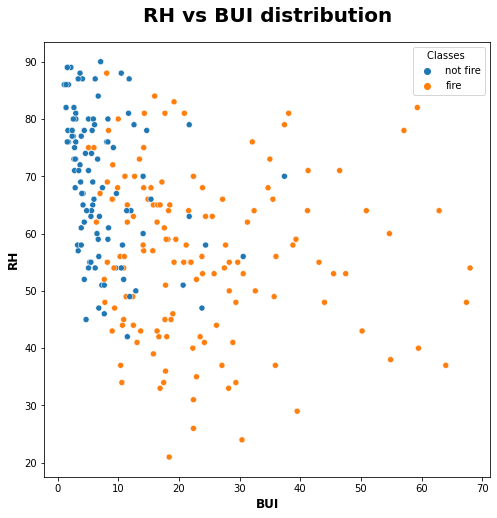

In [616]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='BUI',y=' RH',hue='Classes  ')
plt.title("RH vs BUI distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("RH", weight="bold", fontsize=12)
plt.xlabel("BUI", weight="bold", fontsize=12)
plt.show()

Observation: BUI is more for fire in forest compared to no fire.

For high Relative humidity and high BUI there less chances of fire.But for high humidity and low BUI, there may be chances of getting fire depends on other factors.


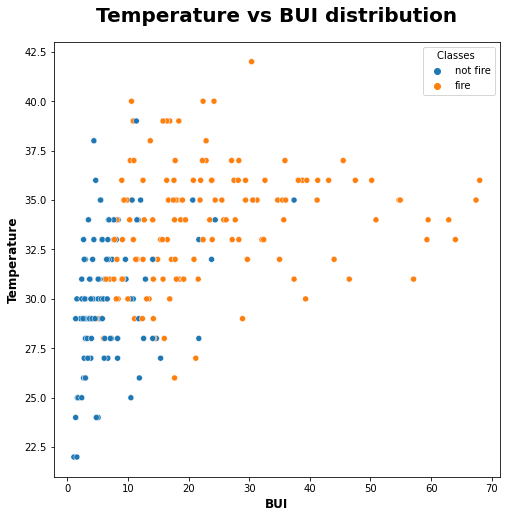

In [617]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='BUI',y='Temperature',hue='Classes  ')
plt.title("Temperature vs BUI distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Temperature", weight="bold", fontsize=12)
plt.xlabel("BUI", weight="bold", fontsize=12)
plt.show()


Observation: At high temperture (above 30 ) and high BUI (above 25) there is more occurence of fire.
    
also, Noticing at high tempertaure and low BUI, There are highly chances of getting fire.

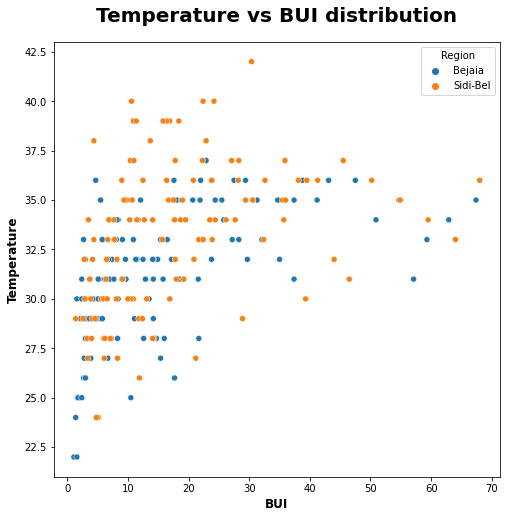

In [618]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='BUI',y='Temperature',hue='Region')
plt.title("Temperature vs BUI distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Temperature", weight="bold", fontsize=12)
plt.xlabel("BUI", weight="bold", fontsize=12)
plt.show()


Observation: Regionise we are not getting any clear idea of data.

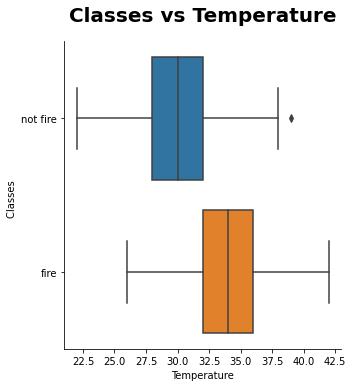

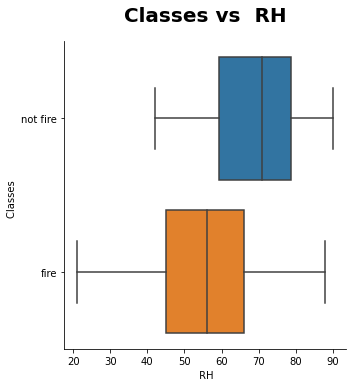

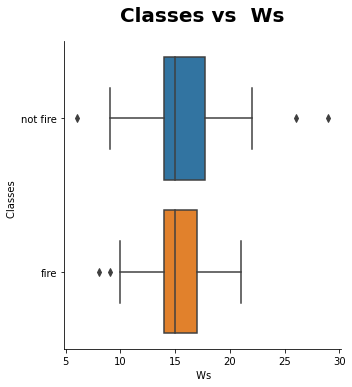

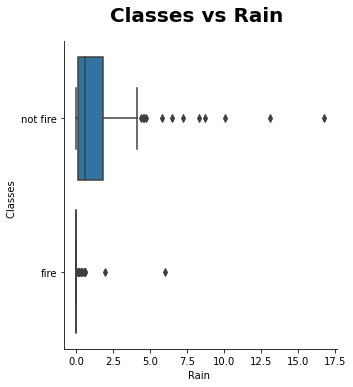

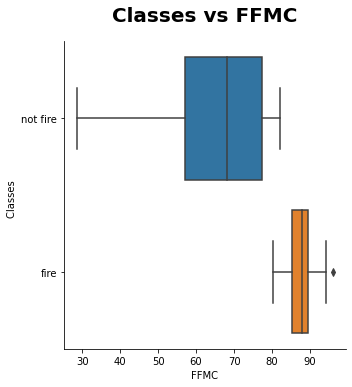

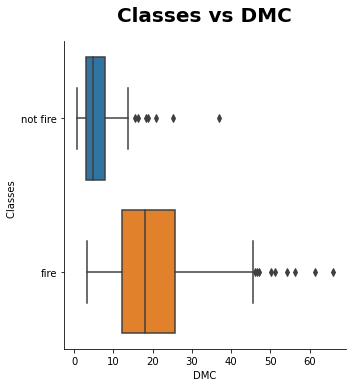

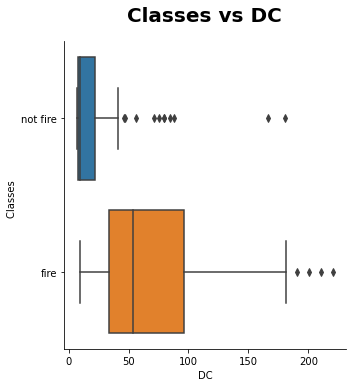

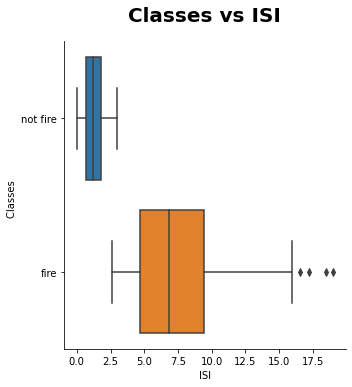

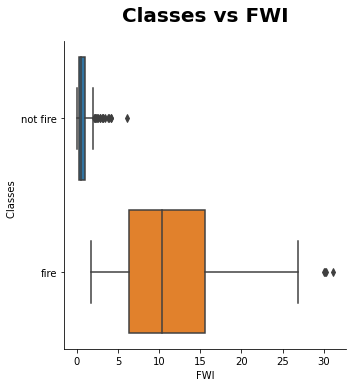

In [619]:
x=['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI',
       'FWI']

for i in x:
    sns.catplot(data=df, x = i, y='Classes  ', kind="box")
    plt.title(f"Classes vs {i}", weight="bold",fontsize=20, pad=20)

Observation: 5 properties seems to be responsible for fire in forest reason. Temprature, FFMC,DMC,DC,ISI,FWI.
    
    BUI is related to DMC and DC.
    
    FWI is related to ISI and BUI.
    
In above table we saw that having 80 above FFMC and all data showing , there should be fire. 

It is no fire. These 5 data points are outliers.

Full Form: 
    
Fine Fuel Moisture Code (FFMC) 

Duff Moisture Code (DMC)

Drought Code (DC)

Initial Spread Index (ISI) 

Buildup Index (BUI) 

Fire Weather Index (FWI) 

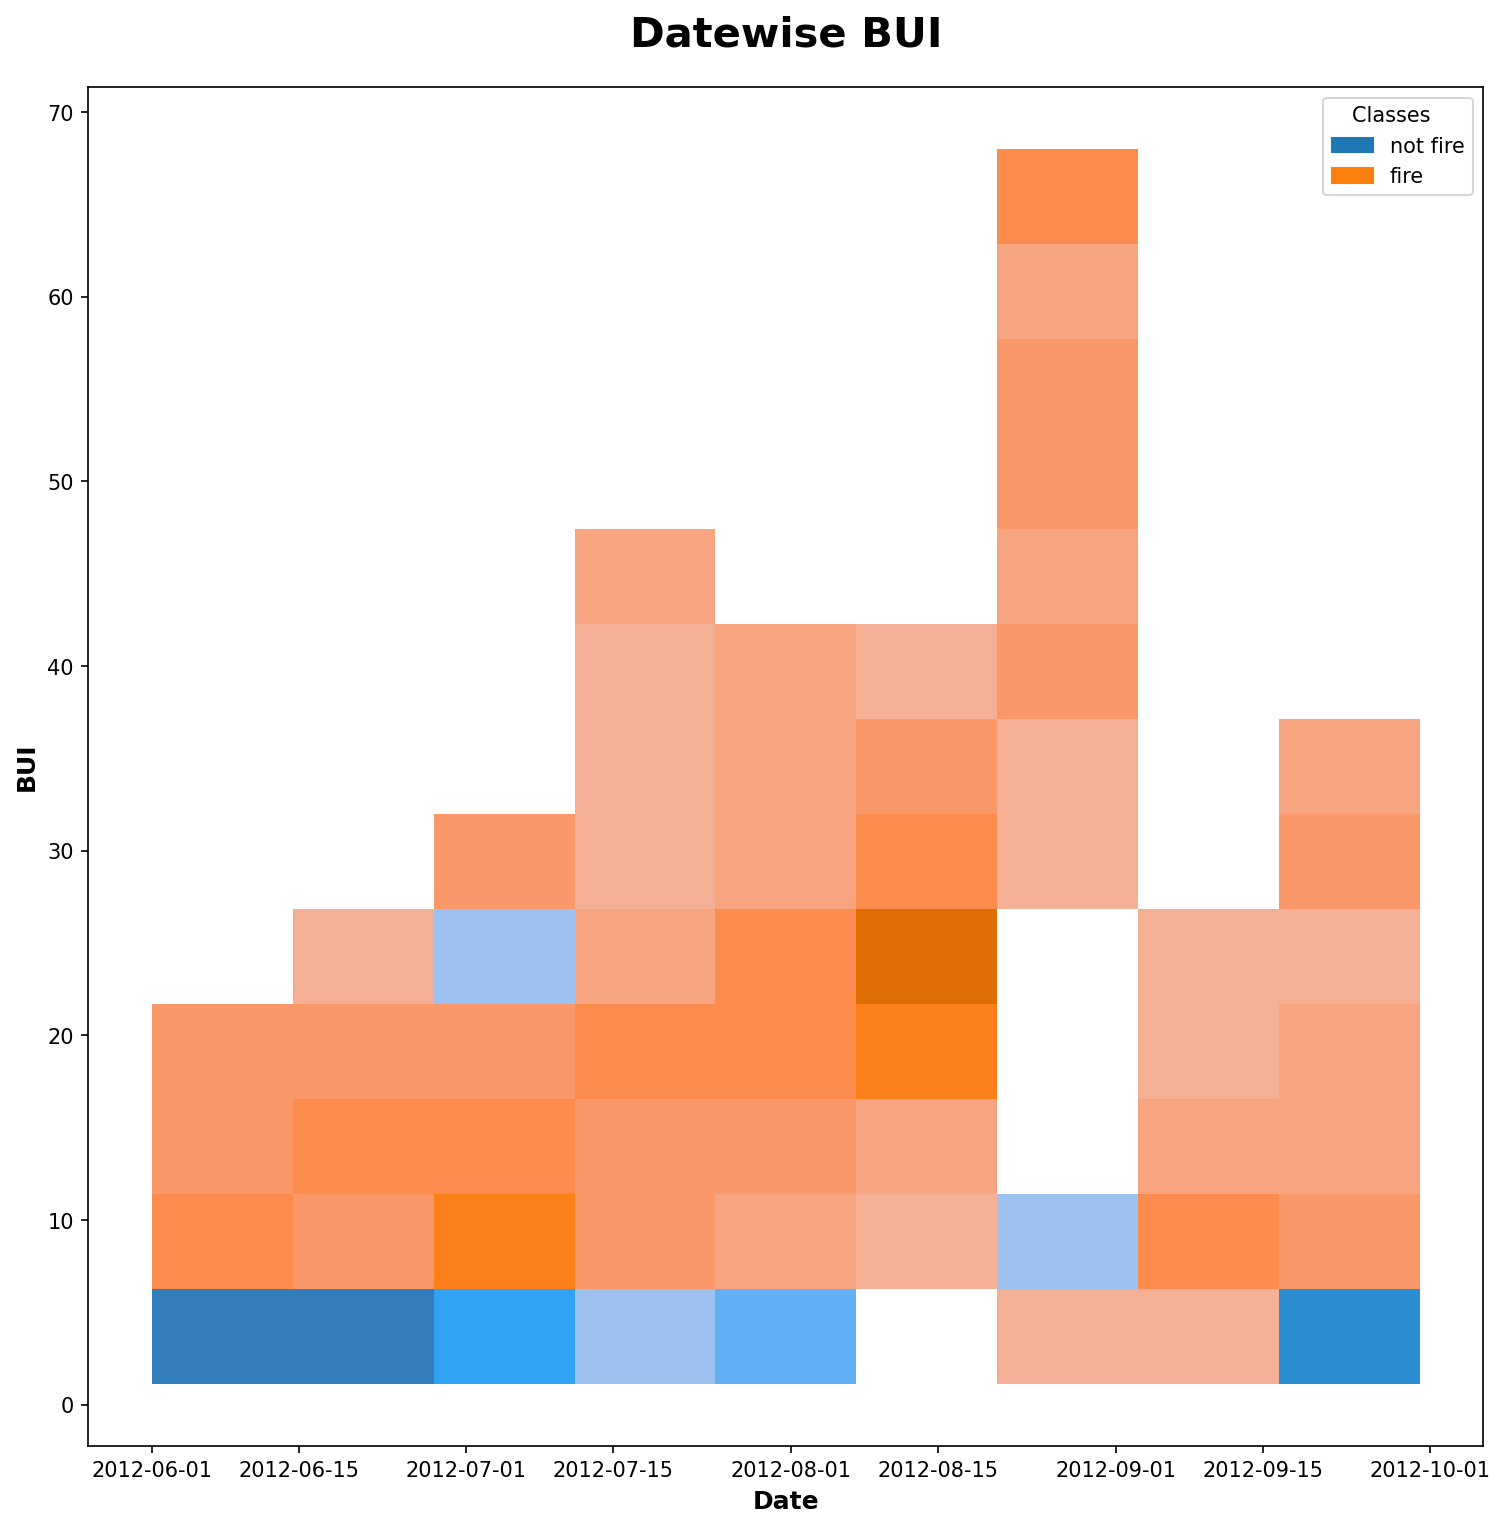

In [620]:
plt.figure(figsize=(12,12),dpi=150)
sns.histplot(df,x='Date',y='BUI',hue='Classes  ')
plt.title("Datewise BUI", weight="bold",fontsize=20, pad=20)
plt.ylabel("BUI", weight="bold", fontsize=12)
plt.xlabel("Date", weight="bold", fontsize=12)
plt.show()

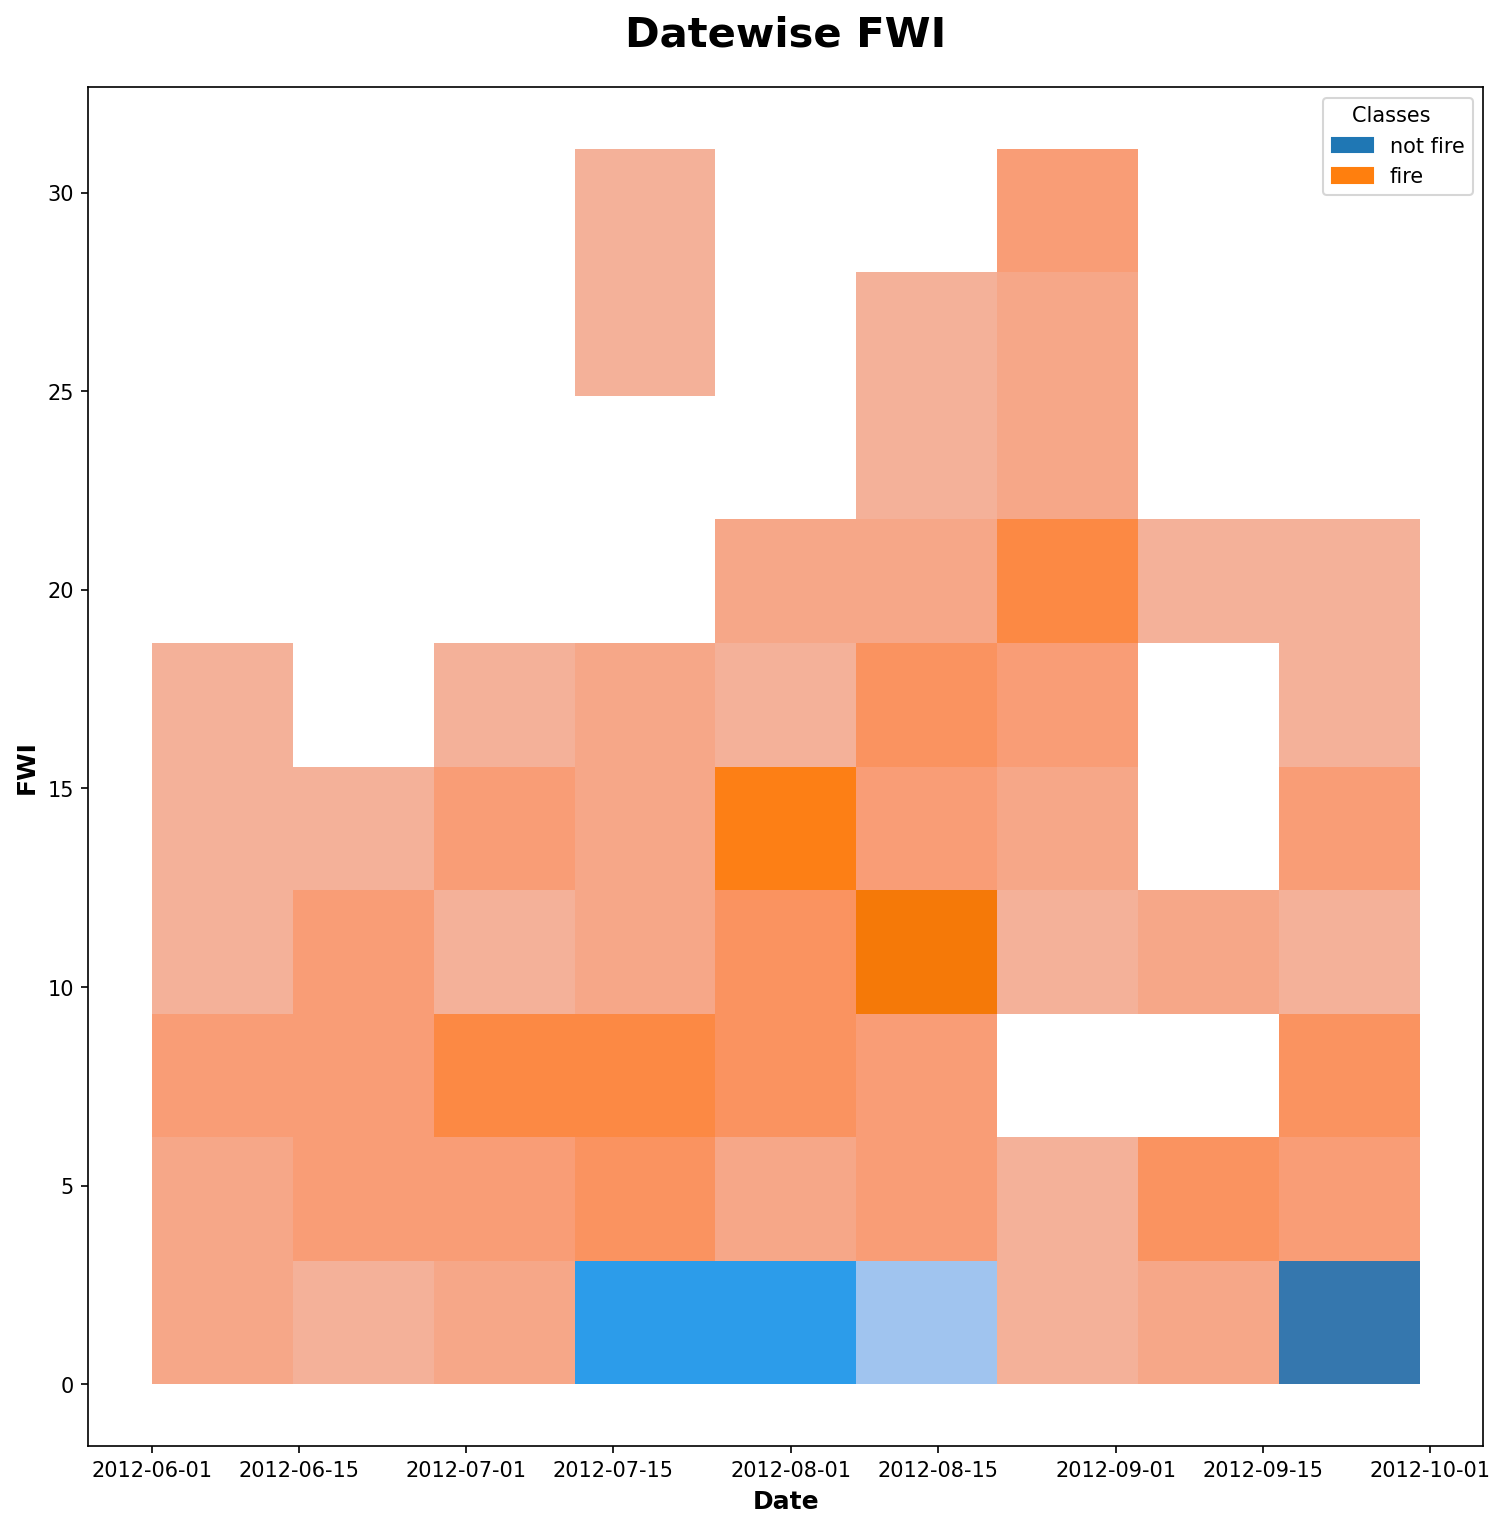

In [621]:
plt.figure(figsize=(12,12),dpi = 150)
sns.histplot(df,x='Date',y='FWI',hue='Classes  ')
plt.title("Datewise FWI", weight="bold",fontsize=20, pad=20)
plt.ylabel("FWI", weight="bold", fontsize=12)
plt.xlabel("Date", weight="bold", fontsize=12)
plt.show()

# Final Report

We can conclude that on datewise basis also high value of FWI, BUI are responsible for fire.

Fire Weather Index (FWI),Fine Fuel Moisture Code (FFMC),Duff Moisture Code (DMC),Drought Code (DC),Initial Spread Index (ISI), Temperature

are the factors responsible for fire.